## Add Liquidity

In [1]:
import pandas as pd
import seaborn as sns

from model import init_utils
from model import processing
# Experiments
from model import run
from model.plot_utils import *

########## AGENT CONFIGURATION ##########
# key -> token name, value -> token amount owned by agent
# note that token name of 'omniABC' is used for omnipool LP shares of token 'ABC'
# omniHDXABC is HDX shares dedicated to pool of token ABC
LP1 = {'omniR1': 109000000}
LP2 = {'omniR2': 80000000}
LP_scale = 0.1
trader = {'HDX': 10900000, 'R0': 700, 'R1': 9000,  'R2': 1300000,  'R3': 8300000} # HDX as Q1
trade_scale = 0.1
# key -> agent_id, value -> agent dict
agent_d = {'Trader': trader, 'LP1': LP1, 'LP2': LP2}
########## ACTION CONFIGURATION ##########
# Use 1% of pool, so 10% of own holdings
action_dict = {
    # 'Swap_i_with_LERNA': {'token_buy': 'HDX', 'token_sell': 'R1', 'amount_sell':  trade_scale*trader['R1'], 'action_id': 'Trade',
    #                    'agent_id': 'Trader'},
    # 'sell_r1_for_r2': {'token_sell': 'R1', 'token_buy': 'R2', 'amount_buy': trade_scale*trader['R2'] , 'action_id': 'Trade',
    #                    'agent_id': 'Trader'},
    # 'Swap_LERNA_with_i': {'token_buy': 'R1', 'token_sell': 'HDX', 'amount_sell':  trade_scale*trader['HDX'], 'action_id': 'Trade',
    #                    'agent_id': 'Trader'},
    'add_liquidity': {'token_add': 'R1', 'amount_add':  LP_scale*LP1['omniR1'], 'action_id': 'AddLiquidity',
                       'agent_id': 'LP1'},
}

# list of (action, number of repetitions of action), timesteps = sum of repititions of all actions
trade_count = 2
# action_ls = [('trade', trade_count)]
action_ls = [('transaction', trade_count)]

# maps action_id to action dict, with some probability to enable randomness
prob_dict = {
    # 'trade': {'Swap_i_with_LERNA':0.0,
    #           'Swap_LERNA_with_i':0.0,
    #           'sell_r2_for_r1': 0.0,
    #           'sell_r1_for_r2': 0.0},  # really buy_r2_with_r1
    'transaction': {'add_liquidity':1.0,
              'remove_liquidity':0.0}
}

########## CFMM INITIALIZATION ##########

initial_values = {
    'token_list': ['R0', 'R1', 'R2', 'R3'],
    'R': [7000, 90000,13000000,8300000],
    'P': [16714.28, 1211.11,6.15,1.87],
    'fee_assets': 0.0015,
    'fee_HDX': 0.0015
}

############################################ SETUP ##########################################################

config_params = {
    'cfmm_type': "",
    'initial_values': initial_values,
    'agent_d': agent_d,
    'action_ls': action_ls,
    'prob_dict': prob_dict,
    'action_dict': action_dict,
}

config_dict, state = init_utils.get_configuration(config_params)

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:.2f}'.format

run.config(config_dict, state)
events = run.run()

rdf, agent_df = processing.postprocessing(events)

print(agent_df.tail(20))




                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (2, 3, 1, 3)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
old_state {'R': [7000, 90000, 13000000, 8300000], 'Q': [116999959.99999999, 108999899.99999999, 79950000.0, 15521000.0], 'S': [7000, 90000, 13000000, 8300000], 'A': [0, 0, 0, 0], 'B': [7000, -108910000, -67000000, 8300000], 'D': 0, 'T': None, 'H': None, 'token_list': ['R0', 'R1', 'R2', 'R3'], 'fee_assets': 0.0015, 'fee_HDX': 0.0015}
token list ['R0', 'R1', 'R2', 'R3']
token add R1
i 1
new state  {'R': [7000, 10990000.0, 13000000, 8300000], 'Q': [116999959.99999999, 13310098899.999998, 79950000.0, 15521000.0], 'S': [7000, 10990000.

In [2]:
agent_df.head()

,simulation,subset,run,substep,timestep,agent_label,q,s-0,s-1,s-2,s-3,r-0,r-1,r-2,r-3,p-0,p-1,p-2,p-3
9,0,0,1,3,1,Trader,10900000,0,0,0,0,700,9000,1300000,8300000,0,0.00,0.00,0
10,0,0,1,3,1,LP1,0,0,109000000,0,0,0,0,0,0,0,1211.11,0.00,0
11,0,0,1,3,1,LP2,0,0,0,80000000,0,0,0,0,0,0,0.00,6.15,0
18,0,0,1,3,2,Trader,10900000,0,0,0,0,700,9000,1300000,8300000,0,0.00,0.00,0
19,0,0,1,3,2,LP1,0,0,109000000,0,0,0,0,0,0,0,1211.11,0.00,0


In [3]:
rdf.head()

,R-0,R-1,R-2,R-3,Q-0,Q-1,Q-2,Q-3,S-0,S-1,...,token_list-2,token_list-3,fee_assets,fee_HDX,n,simulation,subset,run,substep,timestep
0,7000,90000.00,13000000,8300000,116999960.00,108999900.00,79950000.00,15521000.00,7000,90000.00,...,R2,R3,0.00,0.00,4,0,0,1,0,0
3,7000,10990000.00,13000000,8300000,116999960.00,13310098900.00,79950000.00,15521000.00,7000,10990000.00,...,R2,R3,0.00,0.00,4,0,0,1,3,1
6,7000,21890000.00,13000000,8300000,116999960.00,26511197900.00,79950000.00,15521000.00,7000,21890000.00,...,R2,R3,0.00,0.00,4,0,0,1,3,2


In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame(events)

,external,AMM,uni_agents,simulation,subset,run,substep,timestep
0,{},"{'R': [7000, 90000, 13000000, 8300000], 'Q': [...","{'Trader': {'q': 10900000, 's': [0, 0, 0, 0], ...",0,0,1,0,0
1,{},"{'R': [7000, 90000, 13000000, 8300000], 'Q': [...","{'Trader': {'q': 10900000, 's': [0, 0, 0, 0], ...",0,0,1,1,1
2,{},"{'R': [7000, 10990000.0, 13000000, 8300000], '...","{'Trader': {'q': 10900000, 's': [0, 0, 0, 0], ...",0,0,1,2,1
3,{},"{'R': [7000, 10990000.0, 13000000, 8300000], '...","{'Trader': {'q': 10900000, 's': [0, 0, 0, 0], ...",0,0,1,3,1
4,{},"{'R': [7000, 10990000.0, 13000000, 8300000], '...","{'Trader': {'q': 10900000, 's': [0, 0, 0, 0], ...",0,0,1,1,2
5,{},"{'R': [7000, 21890000.0, 13000000, 8300000], '...","{'Trader': {'q': 10900000, 's': [0, 0, 0, 0], ...",0,0,1,2,2
6,{},"{'R': [7000, 21890000.0, 13000000, 8300000], '...","{'Trader': {'q': 10900000, 's': [0, 0, 0, 0], ...",0,0,1,3,2


In [5]:
rdf.columns

Index(['R-0', 'R-1', 'R-2', 'R-3', 'Q-0', 'Q-1', 'Q-2', 'Q-3', 'S-0', 'S-1',
       'S-2', 'S-3', 'A-0', 'A-1', 'A-2', 'A-3', 'B-0', 'B-1', 'B-2', 'B-3',
       'D', 'T', 'H', 'token_list-0', 'token_list-1', 'token_list-2',
       'token_list-3', 'fee_assets', 'fee_HDX', 'n', 'simulation', 'subset',
       'run', 'substep', 'timestep'],
      dtype='object')

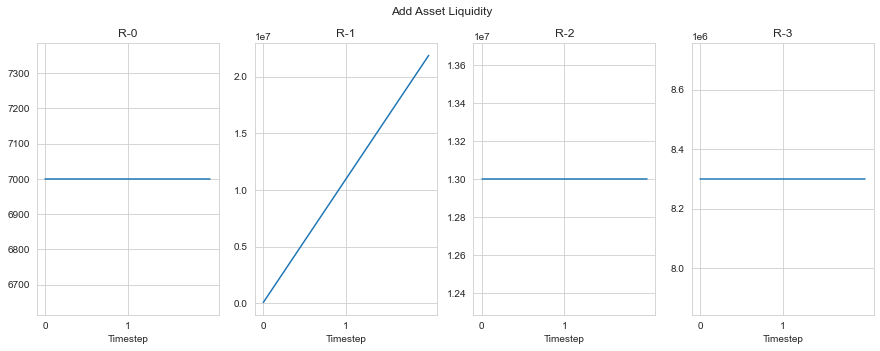

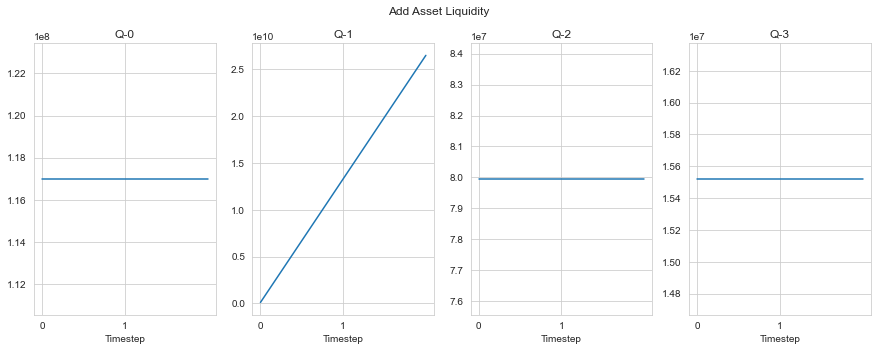

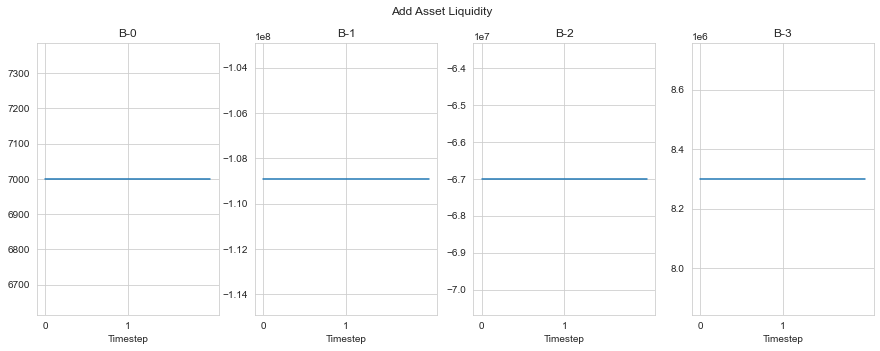

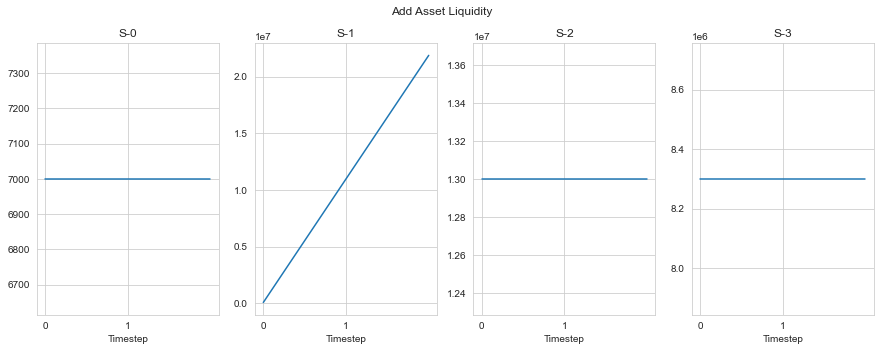

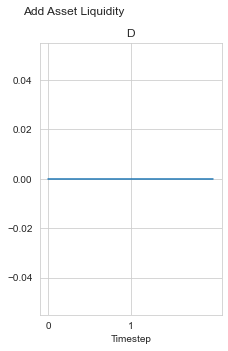

In [6]:
var_list = ['R', 'Q', 'B','S','D']
plot_state(rdf, var_list, plot_title='Add Asset Liquidity')

[0]


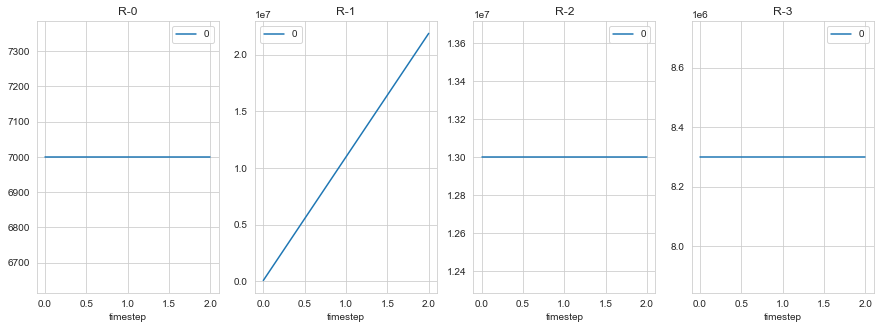

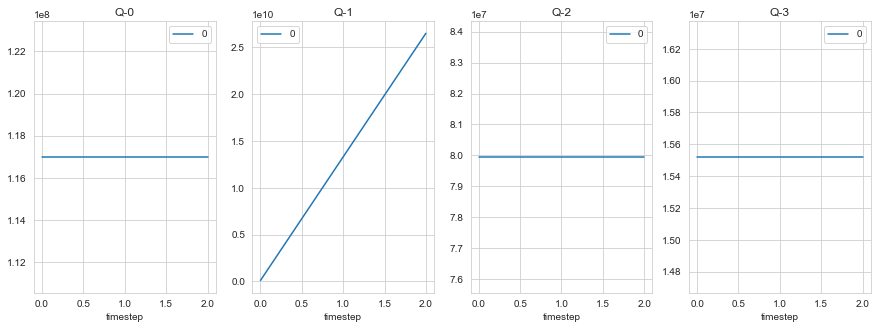

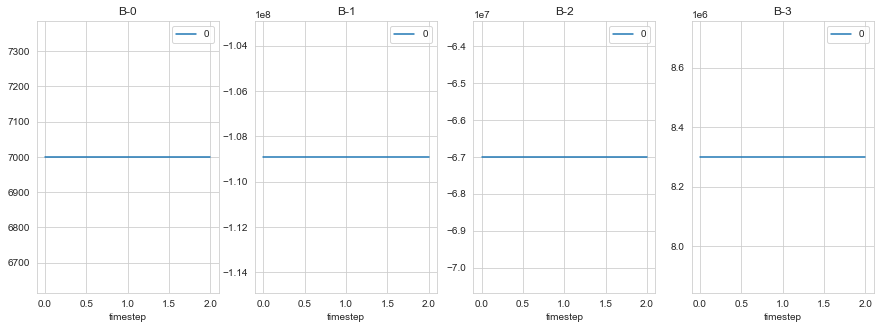

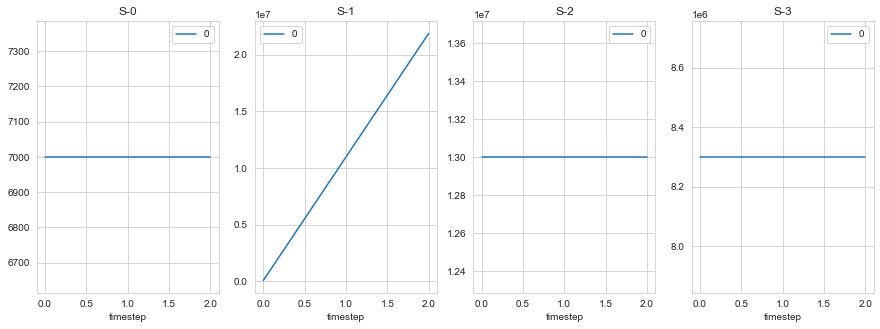

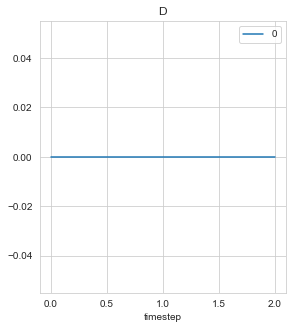

In [7]:

var_list = ['R', 'Q', 'B','S','D']
plot_vars(rdf, var_list)

In [8]:
agent_df

,simulation,subset,run,substep,timestep,agent_label,q,s-0,s-1,s-2,s-3,r-0,r-1,r-2,r-3,p-0,p-1,p-2,p-3
9,0,0,1,3,1,Trader,10900000,0,0,0,0,700,9000,1300000,8300000,0,0.00,0.00,0
10,0,0,1,3,1,LP1,0,0,109000000,0,0,0,0,0,0,0,1211.11,0.00,0
11,0,0,1,3,1,LP2,0,0,0,80000000,0,0,0,0,0,0,0.00,6.15,0
18,0,0,1,3,2,Trader,10900000,0,0,0,0,700,9000,1300000,8300000,0,0.00,0.00,0
19,0,0,1,3,2,LP1,0,0,109000000,0,0,0,0,0,0,0,1211.11,0.00,0
20,0,0,1,3,2,LP2,0,0,0,80000000,0,0,0,0,0,0,0.00,6.15,0


[0]


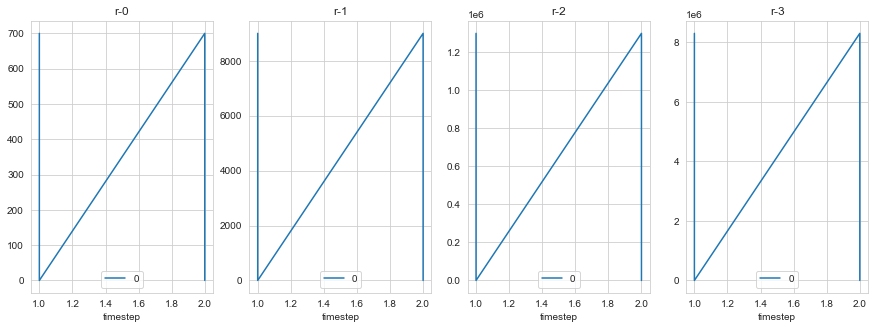

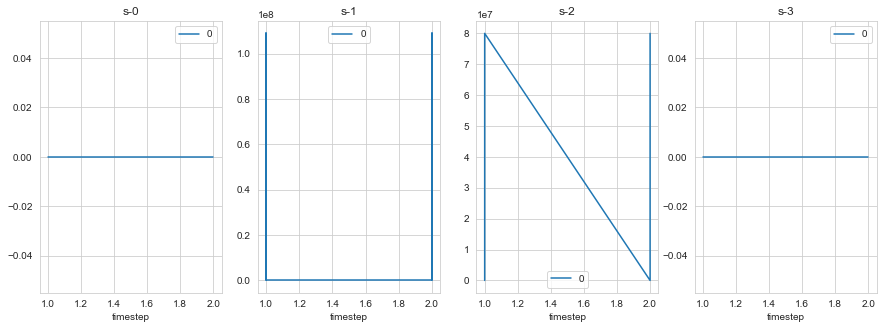

In [9]:
var_list = ['r', 's']
plot_vars(agent_df, var_list)